In [2]:
import pandas as pd
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt

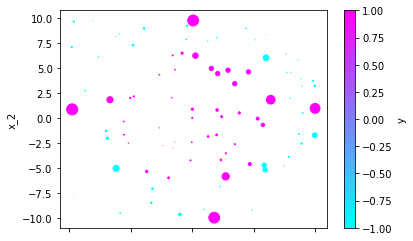

In [58]:
T = 100

data = pd.read_csv("dataCircle.txt", 
                   names=['x_1', 'x_2', 'y'],
                   delim_whitespace=True,
                   dtype={"x_1": np.float64, "x_2": np.float64},
                   converters={"y": lambda x: float(x) * 2 - 1}
                  )

m = len(data)
D = [1/m] * m

def gen_classifier(data):
    feature = random.choice(["x_1", "x_2"])
    bounds = (data[feature].min(), data[feature].max())
    threshold = np.random.uniform(bounds[0], bounds[1])
    parity = 1
    classifier = (threshold, feature, parity)
    if ϵ(classifier) >= 0.5:
        parity = -1
    return (threshold, feature, parity)

def ϵ(h, D=None):
    s = 0
    filtered = data[data.apply(lambda x: x["y"] != apply_classifier(x, *h), axis=1)]
    for i, (x1, x2, y) in filtered.iterrows():
        s += D[i] if D else 1/m
    return s

def apply_classifier(x, threshold, feature, parity):
    return parity if x[feature] < threshold else -parity
    
def plot_iteration(model, D, data):
    predicted = data.apply(lambda x: [x["x_1"], x["x_2"], F(x, model)], axis=1)
    plot_distribution(predicted, D)
    #[plot_lines(iteration) for iteration in model]
    
def scatter(data):
    data.plot.scatter(x="x_1", y="x_2", c="y", colormap="cool")
    
def plot_distribution(data, D):
    data.plot.scatter(x="x_1", y="x_2", c="y", colormap="cool", s=[d * 1000 for d in D])
    
def plot_lines(iteration):
    (alpha, (threshold, feature, parity)) = iteration
    if feature == "x_1":
        plt.axvline(threshold)
    else:
        plt.axhline(threshold)

def F(x, model):
    return 1 if sum((a * apply_classifier(x, *h) for a, h in model)) > 0 else -1

model = []
for t in range(T):
    classifier_candidates = [gen_classifier(data) for _ in range(30)]
    classifier = min(classifier_candidates, key=lambda h: ϵ(h, D))
    error = ϵ(classifier, D)
    alpha = 1/2 * np.log((1 - error) / error)
    model.append((alpha, classifier))
    
    D = [d * np.exp(-alpha * data["y"][i] * apply_classifier(data.iloc[i], *classifier)) for i, d in enumerate(D)]
    Z = 1 / sum(D)
    D = [Z * d for d in D]
    
plot_iteration(model, D, data)

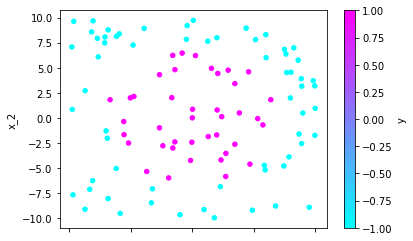

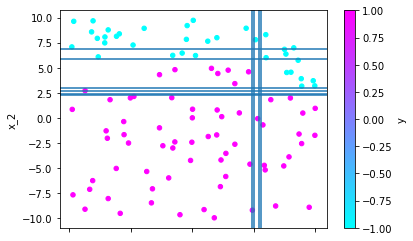

In [30]:
scatter(data)
predicted = data.apply(lambda x: [x["x_1"], x["x_2"], F(x, model)], axis=1)
scatter(predicted)